# Fourier analysis of the intra-cavity field in a probe-control configuration

## Hamiltonian
The Hamiltonian of an optomechanical system with two fields, probe (signal) and control (drive) in the frame rotating with the frequency of the control field, $\omega_l$ is given by:

$$
\begin{equation}
\boxed{\hat{H} = \hbar\Delta\hat{a}^\dagger\hat{a} +\hbar\omega_m\hat{b}^\dagger\hat{b}  - \hbar g_0\hat{a}^\dagger\hat{a}\left(\hat{b}^\dagger + \hat{b}\right) + i\hbar\varepsilon_l\left(a^\dagger  -\hat{a}\right) + i\hbar\varepsilon_p\left(a^\dagger e^{-i(\omega_p - \omega_l) t} -\hat{a}e^{i(\omega_p - \omega_l) t}\right)}
\end{equation}
$$

where,

$$
\begin{equation}
\Delta = \omega_0 - \omega_l
\end{equation}
$$

## Heisenberg's equations of motion

$$
\partial_t\hat{x} = \frac{i}{\hbar}[\hat{H}, \hat{x}]
$$

Using relations, $[\hat{a}^\dagger\hat{a}, \hat{a}] = -\hat{a}$, $[\hat{a}, \hat{a}^\dagger] = 1\implies [\hat{a}^\dagger, \hat{a}] = -1$ and $[\hat{x}^\dagger\hat{x}, 
\hat{y}] =0$ $(x\ne y\in [\hat{a}, \hat{a}^\dagger, \hat{b},\hat{b}^\dagger])$ and putting the decay terms we get, the equations of motion for the expectation value of the operators as:


$$
\begin{align}
\frac{d<\hat{a}>}{dt} &= -\left(\frac{\kappa}{2} + i\Delta\right)<\hat{a}> + ig_0<\hat{a}>\left(<\hat{b}^\dagger> + <\hat{b}>\right) +\varepsilon_l +\varepsilon_p e^{-i(\omega_p - \omega_l) t}\\
%
\frac{d<\hat{b}>}{dt} &= -\left(\frac{\gamma_m}{2} + i\omega_m\right)<\hat{b}> + i g_0<\hat{a}^\dagger\hat{a}>
\end{align}
$$

The above equations are called Heisenberg Langevin equations


# What is resolved sideband regime

When the pump field with frequency $\omega_l$ interacts with the mechanical mirror with frequency $\omega_m$, absorption and emission of phonons create the **Stokes field** ($\omega_l+\omega_m$) and the **anti-Stokes field** ($\omega_l − \omega_m$). During the Stokes process, the pump field extracts a quantum of energy, $\hbar\omega_m$ from the movable mirror, leading to the cooling of the movable mirror. While during the anti-Stokes process, the pump field emits a quantum of energy, $\hbar\omega_m$ to the movable mirror, leading to the heating of the movable mirror. If the pump frequency is detuned below the cavity resonance frequency by an amount $\omega_m$, the amplitude of the Stokes field is resonantly enhanced, since the frequency of the Stokes field is close to the cavity resonance frequency $\omega_0$; however, the anti-Stokes field is suppressed since its frequency is far away from the cavity resonance frequency, thus the optomechanical coupling causes the cooling of the mirror. 

In the "**resolved sideband limit**", the cavity amplitude decay rate $\kappa$ is much less than the mechanical oscillation frequency $\omega_m$. In this case, the linewidth $\kappa$ of the cavity field is much smaller than the frequency spacing $2\omega_m$ between the **Stokes** field and the **Anti-Stokes** field, thus these two sidebands (stokes and anti-stokes) are "**resolved**".  When the pump frequency is detuned below the cavity resonance frequency by an amount, $\omega_m$, the amplitude of the anti-Stokes field is close to zero and ground state cooling becomes possible.



# Libraries

In [97]:
import numpy as np
from scipy.integrate import solve_ivp
import scipy.constants as sc

# Constants

In [98]:
iota = complex(0,1)
pi = sc.pi
hbar = sc.hbar
speed_of_light = sc.c

# Parameters

## Decay rates
$\kappa = 2\pi\times1.5$ MHz, $\gamma_m =2\pi\times41$ KHz, 

## Frequencies
$\omega_m = 2\pi\times51.8$ MHz, $\Delta = \omega_0 - \omega_l = \omega_m$, $\omega_p = \omega_0$, $\omega_l = \omega_0 - \omega_m$

## Other parameters
$\lambda_l = 775$ nm, drive power, $\mathcal{P}_l = 1$ mW, $g_0 = 2\pi\times 1.55$ KHz


In [99]:
# Decay rates
gamma_m_0 = 2*pi*41e3
kappa_0 = 2*pi*1.5e6

# Frequencies
lambda_l = 775e-9
omega_l_0 = 2*pi*speed_of_light/lambda_l
omega_m_0 = 2*pi*51.8e6


# Optomechanical coupling constant
g_0_0 = 2*pi*1.55e3

# detuning
delta_0    = omega_m_0

# cavity resonance frequency
omega_0_0  = delta_0 + omega_l_0

# probe frequency
omega_p_0  = omega_0_0

# Field powers
power_l = 1e-3     # power of control/drive (1 milli watts)
power_p = 1e-5     # power of probe/signal

# field amplitudes
epsilon_l_0 = np.sqrt(2*kappa_0*power_l/(hbar*omega_l_0))
epsilon_p_0 = np.sqrt(2*kappa_0*power_p/(hbar*omega_p_0))


# Parameters normalized w.r.t $\kappa$

In [100]:
# field amplitudes
epsilon_l = epsilon_l_0/kappa_0
epsilon_p = epsilon_p_0/kappa_0

# Optomechanical coupling constant
g_0 = g_0_0/kappa_0


# decay rates
kappa = 1
gamma_m = gamma_m_0/kappa_0

# frequencies
omega_m = omega_m_0/kappa_0
omega_l = omega_l_0/kappa_0

# detuning
delta    = omega_m           # delta = omega_0 - omega_l

# cavity resonance frequency
omega_0  = delta + omega_l

# probe frequency
omega_p = omega_0
#omega_p = 1.3*omega_m + omega_l

# Define the functions

In [101]:

# Define the coupled differential equations
def equations(t, y):
    dydt = np.zeros(2, dtype=np.complex128)
    
    dydt[0] = -(kappa + iota*delta)*y[0] + iota*g_0*(y[1] + np.conj(y[1]))*y[0] + epsilon_l + epsilon_p*np.exp(-iota*(omega_p - omega_l)*t)
    
    dydt[1] = -(gamma_m + iota*omega_m)*y[1] + iota*g_0*np.abs(y[0])**2

    return dydt

# Initial condition and solving the equations

In [102]:
# Initial conditions
y0 = [complex(0,0),complex(0,0)]      # Initial values for y1 and y2
t_span = (0, 6e2)                     # Time span for the solution

# Solve the differential equations
sol = solve_ivp(equations, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], int(6e4)))

# Fourier Transform of $<\hat{a}(t)> = \alpha(t)$ and $<\hat{b}(t)> = \beta(t)$

In [103]:
# Calculate the Fourier transform
fft_alpha = np.fft.fft(sol.y[0])
fft_beta = np.fft.fft(sol.y[1])

# define a time vector
t = np.linspace(t_span[0], t_span[1], int(6e4))

# Calculate the frequencies corresponding to the Fourier transform
freqs = np.fft.fftfreq(len(t), t[1] - t[0])


# Plots

C:\Users\nilam\AppData\Local\Temp\ipykernel_2816\3687491593.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


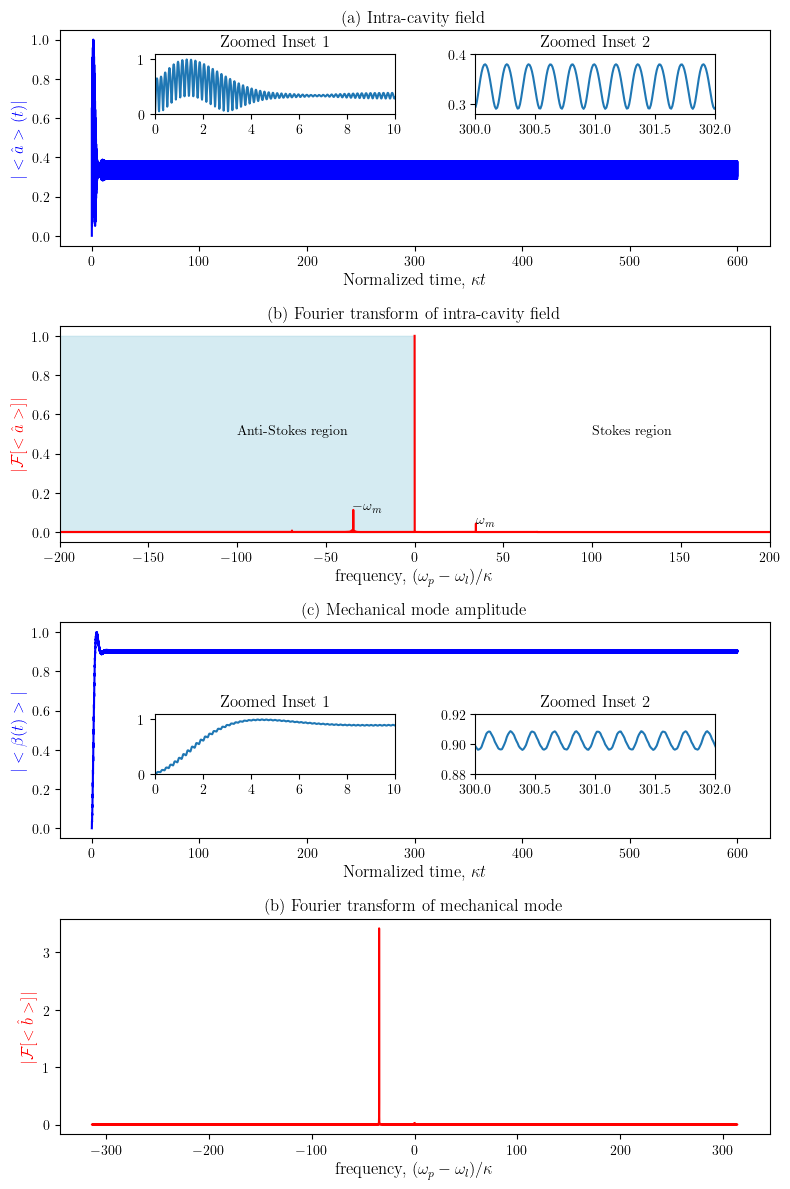

In [104]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# enable TeX fonts
plt.rcParams['text.usetex'] = True

# Set the global font size for all legends
mpl.rcParams['legend.fontsize'] = 12

# Set the global font size for all axis labels
mpl.rcParams['axes.labelsize'] = 12

# Set the global font style for all axis labels
plt.rcParams['font.family'] = 'Times New Roman'


# Create a figure and axis for the subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Data to be plotted
y1 = np.abs(sol.y[0])/np.max(np.abs(sol.y[0]))
y2 = np.abs(sol.y[1])/np.max(np.abs(sol.y[1]))

# Plot the first subplot (top plot)
axs[0].plot(t, y1, label=r'$|<\hat{a}>(t)|$', color='blue')
axs[0].set_title('(a) Intra-cavity field')
axs[0].set_xlabel(r'Normalized time, $\kappa t$')
axs[0].set_ylabel(r'$|<\hat{a}>(t)|$', color='b')
#axs[0].set_xlim([-1, 10])
#axs[0].legend()

# Plot the zoomed inset plot
# Create an inset plot
left, bottom, width, height = [0.2, 0.9, 0.3, 0.05]
ax11_inset = fig.add_axes([left, bottom, width, height])
ax11_inset.plot(t, y1)
ax11_inset.set_xlim(0, 10)  # Set limits for zoomed region
ax11_inset.set_ylim(0, 1.1)
ax11_inset.set_title('Zoomed Inset 1')

# Create an inset plot
left, bottom, width, height = [0.6, 0.9, 0.3, 0.05]
ax12_inset = fig.add_axes([left, bottom, width, height])
ax12_inset.plot(t, y1)
ax12_inset.set_xlim(300, 302)  # Set limits for zoomed region
ax12_inset.set_ylim(0.28, 0.4)
ax12_inset.set_title('Zoomed Inset 2')


# Plot the second subplot

# Annotate the point with an arrow

# Find the first maximum
arr = np.abs(fft_alpha)/np.max(np.abs(fft_alpha))

first_max = np.max(arr)

# Remove the first maximum and find the second maximum
arr_without_first_max = arr[arr != first_max]
second_max = np.max(arr_without_first_max)

# Remove the second maximum and find the third maximum
arr_without_second_max = arr_without_first_max[arr_without_first_max != second_max]
third_max = np.max(arr_without_second_max)

x_point = -omega_m
y_point = second_max
axs[1].annotate(r'$-\omega_m$', xy=(x_point, y_point), xytext=(x_point, y_point))

x_point = omega_m
y_point = third_max
axs[1].annotate(r'$\omega_m$', xy=(x_point, y_point), xytext=(x_point,y_point))

# Shade the region where sin(x) > cos(x)
axs[1].fill_between(2*np.pi*freqs, 0, 1, where=(2*np.pi*freqs < 0), color='lightblue', alpha=0.5)

# label the shaded regions
axs[1].annotate('Anti-Stokes region', xy=(-150, 0.5), xytext=(-100, 0.5))
axs[1].annotate('Stokes region', xy=(100, 0.5), xytext=(100, 0.5))

axs[1].plot(2*np.pi*freqs, np.abs(fft_alpha)/np.max(np.abs(fft_alpha)), label=r'$|\mathcal{F}[<\hat{a}>]|$', color='red')
axs[1].set_title('(b) Fourier transform of intra-cavity field')
axs[1].set_xlabel(r'frequency, $(\omega_p - \omega_l)/\kappa$')
axs[1].set_ylabel(r'$|\mathcal{F}[<\hat{a}>]|$',  color='r')
axs[1].set_xlim([-200, 200])

# plot the third subplot
axs[2].plot(t, y2, 'b-')
axs[2].set_title('(c) Mechanical mode amplitude')
axs[2].set_xlabel(r'Normalized time, $\kappa t$')
axs[2].set_ylabel(r'$|<\beta(t)>|$', color='b', fontsize = 12)

# Plot the zoomed inset plot
# Create an inset plot 1
left, bottom, width, height = [0.2, 0.35, 0.3, 0.05]
ax31_inset = fig.add_axes([left, bottom, width, height])
ax31_inset.plot(t, y2)
ax31_inset.set_xlim(0, 10)  # Set limits for zoomed region
ax31_inset.set_ylim(0, 1.1)
ax31_inset.set_title('Zoomed Inset 1')

# Create an inset plot 2
left, bottom, width, height = [0.6, 0.35, 0.3, 0.05]
ax32_inset = fig.add_axes([left, bottom, width, height])
ax32_inset.plot(t, y2)
ax32_inset.set_xlim(300, 302)  # Set limits for zoomed region
ax32_inset.set_ylim(0.88, 0.92)
ax32_inset.set_title('Zoomed Inset 2')


# Plot the fourth subplot (bottom plot)
axs[3].plot(2*np.pi*freqs, np.abs(fft_beta)/np.max(np.abs(fft_alpha)), label=r'$|\mathcal{F}[<\hat{b}>]|$', color='red')
axs[3].set_title('(b) Fourier transform of mechanical mode')
axs[3].set_xlabel(r'frequency, $(\omega_p - \omega_l)/\kappa$')
axs[3].set_ylabel(r'$|\mathcal{F}[<\hat{b}>]|$',  color='r')

# Adjust the layout to prevent overlap
plt.tight_layout()

# save the plot to a file
plt.savefig('figure10.png', dpi=300)

# Show the plots
plt.show()
